In [211]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import numpy as np

#### Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [212]:
from sklearn.datasets import load_boston
boston = load_boston()

In [213]:
trgt = boston.target

In [214]:
fn = boston.feature_names

In [215]:
fn

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [216]:
X = pd.DataFrame(boston.data, columns=fn)

In [217]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [218]:
y = pd.DataFrame(trgt, columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [221]:
from sklearn.linear_model import LinearRegression

In [222]:
lr = LinearRegression()

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [223]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
y_pred = lr.predict(X_test)

In [225]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [226]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [227]:
from sklearn.metrics import r2_score

In [228]:
r2_score(y_test, y_pred)

0.711226005748496

#### Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000,

max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,

но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],

чтобы получить из датафрейма одномерный массив Numpy,

так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [229]:
from sklearn.ensemble import RandomForestRegressor

In [230]:
regr = RandomForestRegressor(max_depth = 12, random_state=42, n_estimators=1000)

In [231]:
regr.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [232]:
# training_scores_encoded
# y_train

regr.fit(X_train, y_train.values[:, 0])
y_pred = regr.predict(X_test)

In [233]:
r2_score(y_test, y_pred)

0.8749965273218174

лучший ответ RandomForestRegressor = 0.8749965273218174

#### * Задание 3
Вызовите документацию для класса RandomForestRegressor,

найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,

установите, какие два признака показывают наибольшую важность.

In [234]:
? RandomForestRegressor

Attributes
----------
....<br/>
feature_importances_ : array of shape = [n_features]<br/>
    The feature importances (the higher, the more important the feature).<br/>
....<br/>

In [235]:
regr.feature_importances_.sum()

0.9999999999999999

In [236]:
regr.feature_importances_

array([0.03211748, 0.00154999, 0.0070941 , 0.0011488 , 0.01436832,
       0.40270459, 0.01424477, 0.06403265, 0.00496762, 0.01169177,
       0.01808961, 0.0123114 , 0.41567892])

In [237]:
# подсмотрено тут:
# https://nuancesprog.ru/p/1257/

# Get numerical feature importances
importances = list(regr.feature_importances_)

In [238]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fn, importances)]

In [239]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [240]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: LSTAT                Importance: 0.42
Variable: RM                   Importance: 0.4
Variable: DIS                  Importance: 0.06
Variable: CRIM                 Importance: 0.03
Variable: PTRATIO              Importance: 0.02
Variable: INDUS                Importance: 0.01
Variable: NOX                  Importance: 0.01
Variable: AGE                  Importance: 0.01
Variable: TAX                  Importance: 0.01
Variable: B                    Importance: 0.01
Variable: ZN                   Importance: 0.0
Variable: CHAS                 Importance: 0.0
Variable: RAD                  Importance: 0.0


#### *Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection. Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.<br />

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.<br />

Загрузите датасет creditcard.csv и создайте датафрейм df.<br />

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков. Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:<br />
pd.options.display.max_columns = 100.<br />

Просмотрите первые 10 строк датафрейма df.<br />
Создайте датафрейм X из датафрейма df, исключив столбец Class.<br />
Создайте объект Series под названием y из столбца Class.<br />
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.<br />
У вас должны получиться объекты X_train, X_test, y_train и y_test.<br />
Просмотрите информацию о их форме.<br />
Для поиска по сетке параметров задайте такие параметры:<br />
parameters = [{'n_estimators': [10, 15],<br />
'max_features': np.arange(3, 5),<br />
'max_depth': np.arange(4, 7)}]<br />
Создайте модель GridSearchCV со следующими аргументами:<br />
estimator=RandomForestClassifier(random_state=100),<br />
param_grid=parameters,<br />
scoring='roc_auc',<br />
cv=3.<br />

Обучите модель на тренировочном наборе данных (может занять несколько минут).<br />
Просмотрите параметры лучшей модели с помощью атрибута best_params_.<br />
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.<br />
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.<br />
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.

In [241]:
url = 'importFiles\creditcard.csv'

In [242]:
cc = pd.read_csv(url)

In [243]:
cc.shape

(284807, 31)

In [244]:
from sklearn.model_selection import GridSearchCV

In [245]:
df = pd.DataFrame(cc)

In [246]:
print(df['V1'].value_counts(normalize=True))
print(df['Time'].value_counts(normalize=True))
print(df['Amount'].value_counts(normalize=True))

 2.055797    0.000270
 1.245674    0.000270
 2.053311    0.000218
 1.302378    0.000211
 2.040211    0.000186
               ...   
-0.069327    0.000004
-1.619420    0.000004
 1.174923    0.000004
 2.157306    0.000004
 2.287784    0.000004
Name: V1, Length: 275663, dtype: float64
163152.0    0.000126
64947.0     0.000091
68780.0     0.000088
3767.0      0.000074
3770.0      0.000070
              ...   
2088.0      0.000004
64100.0     0.000004
42068.0     0.000004
119630.0    0.000004
140344.0    0.000004
Name: Time, Length: 124592, dtype: float64
1.00       0.048061
1.98       0.021221
0.89       0.017106
9.99       0.016667
15.00      0.011517
             ...   
192.63     0.000004
218.84     0.000004
195.52     0.000004
793.50     0.000004
1080.06    0.000004
Name: Amount, Length: 32767, dtype: float64


In [247]:
pd.options.display.max_columns = 100

In [248]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [249]:
X = df.drop(['Class'], axis=1)

In [250]:
y = df['Class']

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (199364, 30)
X_test: (85443, 30)
y_train: (199364,)
y_test: (85443,)


Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:<br />
estimator=RandomForestClassifier(random_state=100),<br />
param_grid=parameters,<br />
scoring='roc_auc',<br />
cv=3.

In [195]:
params = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                   param_grid=params,
                   scoring='roc_auc',
                   cv=3)

Обучите модель на тренировочном наборе данных (может занять несколько минут).

In [196]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

In [197]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

In [201]:
predProb = clf.predict_proba(X_train)

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. 

In [208]:
y_pred_proba = predProb[:, 1]
y_pred_proba

array([0.00028215, 0.00028215, 0.00028215, ..., 0.00028215, 0.00028215,
       0.00026266])

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.


In [204]:
from sklearn.metrics import roc_auc_score

Вычислите AUC на тестовых данных и сравните с результатом, полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [210]:
roc_auc_score(y_test, y_pred_proba)
#упала с ошибкой: Found input variables with inconsistent numbers of samples: [85443, 199364]

ValueError: Found input variables with inconsistent numbers of samples: [85443, 199364]

##### *Дополнительные задания:
1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [29]:
from sklearn.datasets import load_wine
wine = load_wine()

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [30]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [31]:
data = wine.data

In [32]:
data.shape

(178, 13)

In [33]:
target = wine.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
fn = wine.feature_names
fn

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [35]:
#for line in wine.DESCR.split('\n'):
#    print(line)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

4). Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.

In [36]:
target.shape

(178,)

In [37]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

ответ: 3 класса

5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [38]:
X = pd.DataFrame(data, columns=fn)

6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [40]:
X['target'] = target.astype(np.int64)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

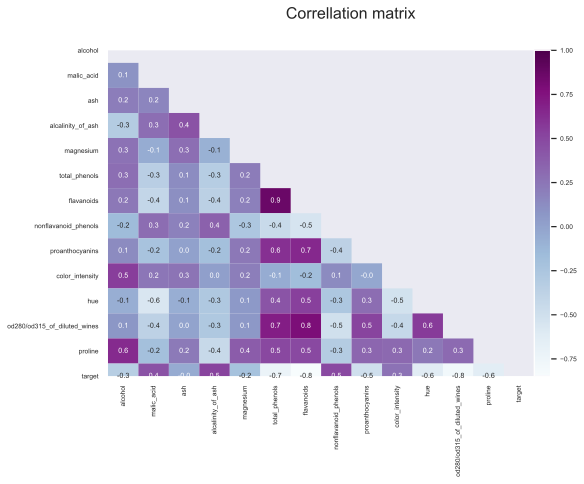

In [42]:
#без классов
X_corr1 = X.drop(['target'], axis=1).corr()
#с классами
X_corr2 = X.corr()


# fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
fig, ax1 = plt.subplots(ncols=1, sharex=True, sharey=True)

fig.set_size_inches(9, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

sns.set(font_scale=0.6)
fig.suptitle('Correllation matrix', fontsize=16)


mask1 = np.zeros_like(X_corr2, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True

#sns.heatmap(X_corr1, mask=mask, ax=ax1, cbar=False, annot=True, fmt=".1f", linewidths=.5, cmap='BuPu')
sns.heatmap(X_corr2, mask=mask1, ax=ax1, cbar=False, annot=True, fmt=".1f", cmap='BuPu')
fig.colorbar(ax1.collections[0], ax=ax1, location='right', use_gridspec=False, pad=0)



# mask2 = np.zeros_like(X_corr2, dtype=np.bool)
# mask2[np.triu_indices_from(mask2)] = True

# sns.heatmap(X_corr2, mask=mask2, ax=ax2, cbar=False, annot=True, fmt=".1f", cmap='BuPu')
# #fig.colorbar(ax2.collections[0], ax=ax2, location='right', use_gridspec=False, pad=0)

# ax2.xaxis.
# ax2.yaxis.tick_right()
# ax2.tick_params(rotation=90)

plt.show()


9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [59]:
high_corr = np.abs(X_corr2.drop('target')['target'])
# high_corr = high_corr[high_corr > 0.5].sort_values(ascending=False).reset_index()
high_corr = high_corr[high_corr > 0.5].sort_values(ascending=False).reset_index().drop('target', axis=1)
high_corr

,index
0,flavanoids
1,od280/od315_of_diluted_wines
2,total_phenols
3,proline
4,hue
5,alcalinity_of_ash


10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.